In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\Data science\\Week6\\Logistic_regression_day2\\logisticRegression_hands-on'

In [4]:
heart=pd.read_csv("Heart.csv")

In [5]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
heart=heart.rename(columns={'Unnamed: 0':'P_ID'})

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
P_ID         303 non-null int64
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           299 non-null float64
Thal         301 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [8]:
#Here we are dropping the null values. So the rows got decreased fromm 300 to 297
heart=heart.dropna()

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
P_ID         297 non-null int64
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null object
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null object
AHD          297 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB


In [11]:
heart.head()

,P_ID,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [13]:
#Giving numerical values to the categorical column. We can't use factorise for ordinal columns
heart.ChestPain = pd.factorize(heart.ChestPain)[0]
heart.Thal = pd.factorize(heart.Thal)[0]

In [14]:
heart.head()

,P_ID,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,No
1,2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,3,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,4,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,No
4,5,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,No


In [15]:
X = heart.drop('AHD', axis=1)
y = pd.factorize(heart.AHD)[0]

In [17]:
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int6

In [18]:
heart.describe()

,P_ID,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,150.673401,54.542088,0.676768,1.531987,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,1.326599
std,87.323283,9.049736,0.468500,0.858082,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.585061
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,75.000000,48.000000,0.000000,1.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,150.000000,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000
75%,226.000000,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000


In [19]:
import seaborn as sns

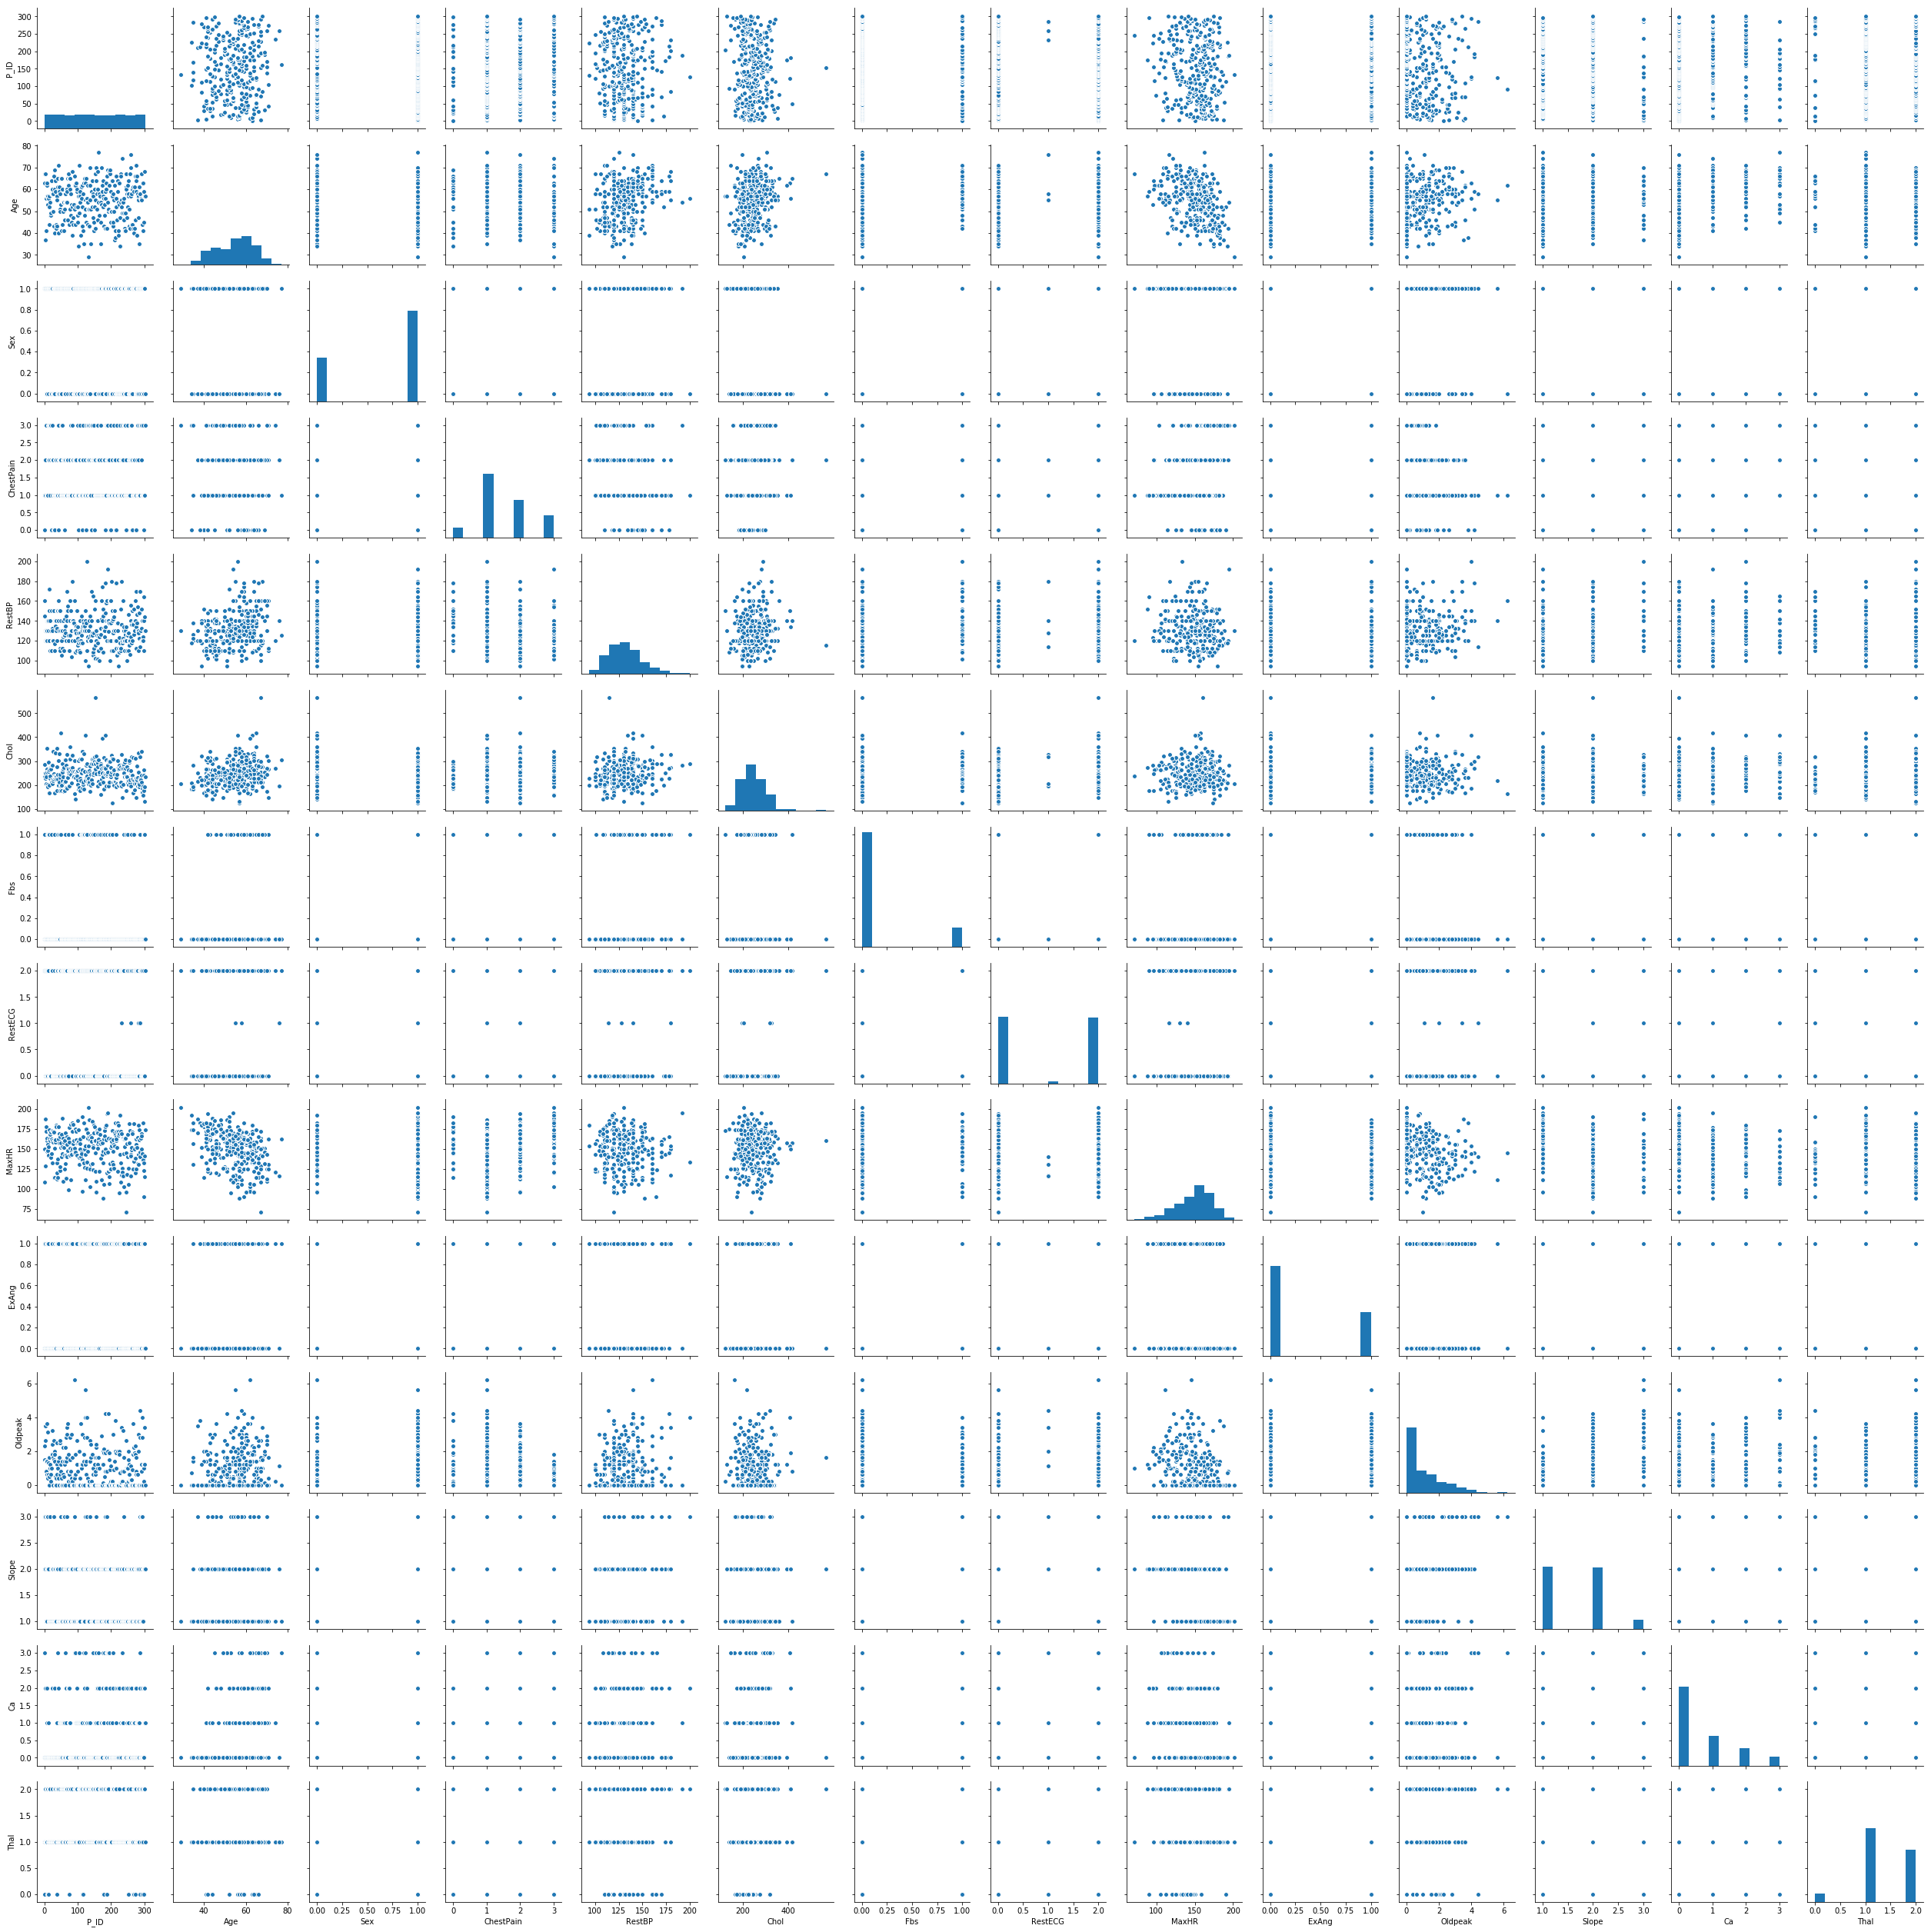

In [24]:
sns.pairplot(heart)

In [25]:
heart.groupby('AHD').count()

,P_ID,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
AHD,,,,,,,,,,,,,,
No,160,160,160,160,160,160,160,160,160,160,160,160,160,160
Yes,137,137,137,137,137,137,137,137,137,137,137,137,137,137


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [39]:
model_train=LogisticRegression()
model_train.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_train_predict=model_train.predict(X_train)
print(y_train_predict)

[0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1]


In [41]:
model_train.intercept_

array([-0.55465898])

In [42]:
model_train.coef_

array([[ 0.00220517, -0.04100689,  1.07520634, -0.3336929 ,  0.01826129,
         0.0056284 , -0.27930917,  0.19779156, -0.03592503,  0.81509634,
         0.24592016,  0.511104  ,  1.27165889,  1.03472124]])

In [43]:
model_score = model_train.score(X_train, y_train)
print(model_score)

0.8695652173913043


In [38]:
from sklearn import metrics
cm_train=metrics.confusion_matrix(y_train, y_train_predict)
cm_train

array([[103,  11],
       [ 16,  77]], dtype=int64)

In [44]:
model_test=LogisticRegression()
model_test.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
model_score=model_test.score(X_test,y_test)
model_score

0.8555555555555555

In [46]:
def classficationModelAccuracies(x, y):
    model1 = LogisticRegression()
    ## split data into train and test
    seed = 7
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)
    ## Train the model with train data
    model1.fit(x_train, y_train)
    
    ## Train accuracies
    predictedClass = model1.predict(x_train)
    cMatrix = metrics.confusion_matrix(predictedClass, y_train)
    cMatrix
    # Classification accuracy
    trainClassificationAccuracy = (cMatrix[0][0] + cMatrix[1][1])/sum(sum(cMatrix))
    ## TP percentage
    trainTpPct = (cMatrix[1][1])/(cMatrix[1][0] + cMatrix[1][1])
    ## FP = Flase postive -> does not have disease but predicted as having disease
    # FP percentage
    trainFpPct = (cMatrix[0][1])/(cMatrix[0][0] + cMatrix[0][1])
    trainAccuracies = [len(y_train), trainClassificationAccuracy, trainTpPct, trainFpPct]
    
    ## Test accuracies
    predictedClass = model1.predict(x_test)
    cMatrix = metrics.confusion_matrix(predictedClass, y_test)
    cMatrix
    # Classification accuracy
    testClassificationAccuracy = (cMatrix[0][0] + cMatrix[1][1])/sum(sum(cMatrix))
    ## TP percentage
    testTpPct = (cMatrix[1][1])/(cMatrix[1][0] + cMatrix[1][1])
    ## FP = Flase postive -> does not have disease but predicted as having disease
    # FP percentage
    testFpPct = (cMatrix[0][1])/(cMatrix[0][0] + cMatrix[0][1])
    testAccuracies = [len(y_test), testClassificationAccuracy, testTpPct, testFpPct]
    
    ## Results
    resultDf = pd.DataFrame(index = ["dataSize", "accuracy", "tpPct", "fpPct"])
    resultDf['train'] = trainAccuracies
    resultDf['test'] = testAccuracies
    
    return(round(resultDf, 4))

In [47]:
classficationModelAccuracies(X, y)

,train,test
dataSize,207.0000,90.0000
accuracy,0.8696,0.8444
tpPct,0.8750,0.8750
fpPct,0.1345,0.1800


In [59]:
#calculating VIF
def multi_collinearity(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF=pd.DataFrame()
    VIF['columns']=X.columns
    VIF['vif']=vif
    return(VIF)

In [60]:
#Using the above function we will calculate the VIF 
multi_collinearity(X)
#We have high VIF value for RestBP so I will drop that column and agian check for VIF
#we need to remove the VIF iteratively, but not at a time

,columns,vif
0,P_ID,4.086055
1,Age,42.038841
2,Sex,3.383935
3,ChestPain,5.075459
4,RestBP,60.383223
5,Chol,26.236112
6,Fbs,1.246533
7,RestECG,2.235242
8,MaxHR,37.139418
9,ExAng,1.883180


In [62]:
X.drop('RestBP',axis=1,inplace=True)
#Dropped column again checking 

In [64]:
multi_collinearity(X)

,columns,vif
0,P_ID,4.021799
1,Age,32.147357
2,Sex,3.382746
3,ChestPain,5.074303
4,Chol,25.856714
5,Fbs,1.224233
6,RestECG,2.221534
7,MaxHR,28.240911
8,ExAng,1.867901
9,Oldpeak,3.282692


In [65]:
X.drop('Age',axis=1,inplace=True)

In [66]:
multi_collinearity(X)

,columns,vif
0,P_ID,3.878290
1,Sex,3.378429
2,ChestPain,5.058771
3,Chol,21.866132
4,Fbs,1.215998
5,RestECG,2.207517
6,MaxHR,25.565500
7,ExAng,1.864181
8,Oldpeak,3.282426
9,Slope,10.557652


In [67]:
X.drop('MaxHR',axis=1,inplace=True)

In [68]:
multi_collinearity(X)

,columns,vif
0,P_ID,3.737697
1,Sex,3.116354
2,ChestPain,4.396065
3,Chol,13.751778
4,Fbs,1.213374
5,RestECG,2.201318
6,ExAng,1.795802
7,Oldpeak,3.256075
8,Slope,10.293978
9,Ca,1.815490


In [69]:
X.drop('Chol',axis=1,inplace=True)

In [70]:
multi_collinearity(X)

,columns,vif
0,P_ID,3.525541
1,Sex,3.116129
2,ChestPain,3.527258
3,Fbs,1.212303
4,RestECG,2.024226
5,ExAng,1.788837
6,Oldpeak,3.246700
7,Slope,9.156097
8,Ca,1.792399
9,Thal,5.682044


In [71]:
classficationModelAccuracies(X,y)

,train,test
dataSize,207.0000,90.0000
accuracy,0.8261,0.8222
tpPct,0.8065,0.8684
fpPct,0.1579,0.2115


In [73]:
X.drop('P_ID',axis=1,inplace=True)

In [74]:
classficationModelAccuracies(X,y)

,train,test
dataSize,207.0000,90.0000
accuracy,0.8261,0.8222
tpPct,0.8065,0.8684
fpPct,0.1579,0.2115
